# "Creating Chinese Word Clouds"
> "visual representation of text data"

- toc: true 
- badges: true
- comments: true
- categories: [level-4, chapter-4, jieba, text-mining, data-visualization]
- image: images/wordcloud.png

***

## **Background**

Hello. In this lesson, you will learn how to create your word clouds in Chinese languages using Python. Different from the online tools, using specific libraries ["Jieba"](https://github.com/fxsjy/jieba) highly improve the performance of tokenizing Chinese text. You can also customize different options such as the colour use or shape mask. If you are running this notebook in [Colab](https://pinkychow1010.github.io/digital-chinese-history-blog/level-1/chapter-1/jupyter/colab/2020/01/30/JupyterNotebook_Colab_Basics.html), you do not need to download or install any items. We will create the word cloud using predefined images and texts, but you can also change it to any content you like.

<br>

As mentioned in the [instructions](https://pinkychow1010.github.io/digital-chinese-history-blog/about/), all materials can be open in Colab as Jupyter notebooks. In this way, users can run the code in the cloud. It is highly recommended to follow the [tutorials](https://pinkychow1010.github.io/digital-chinese-history-blog/) in the right order. To optimize your learning experience, you are supposed to know the Python basics, including how to write and use a function. They are all included in the previous tutorials.

## Connection to Google Drive

As the resources are in the drive, we need to allow Colab to connect to the **Google Drive**. It can be done by running the following code. Then a new window will be open for you to **sign in** and **give permission**.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Download Resources

To run all the code, we have to download a few items using **wget**, which is a way to retrieve content from web servers. To understand more about wget, you can visit [here](https://www.hostinger.com/tutorials/wget-command-examples/).

Because the library we are going to use do not have a default option to display Chinese, we have to download a Chinese font for proper display. If you run the following code, the resources will be downloaded into your **Google Drive**.

* Chinese Font

In [3]:
! wget https://raw.githubusercontent.com/victorgau/wordcloud/master/SourceHanSansTW-Regular.otf -o /dev/null -P /content/drive/MyDrive/

To prevent common words to be classified as keywords, we need to define stopwords ourselves. There is existing resources for that in Chinese, but you can also create you own.

* Stopwords

In [ ]:
! wget https://github.com/stopwords-iso/stopwords-zh/blob/master/stopwords-zh.txt -P /content/drive/MyDrive/

Then, we have to download the images, including the ones for the mask and color selection.

* Images

In [ ]:
! wget https://github.com/pinkychow1010/digital-chinese-history-blog/blob/master/images/tree.jpg -P /content/drive/MyDrive/

In [ ]:
! wget https://github.com/pinkychow1010/digital-chinese-history-blog/blob/master/images/song.png -P /content/drive/MyDrive/

## Set Up Environment

We need to download and import specific libraries to set up our cloud environment by running the following code. We will download the library using **pip**.

### Download Library

In [ ]:
# The library for Chinese Text Processing
! pip install jieba
# The library for Creating Word Cloud
! pip install wordcloud

### Import Library

In [27]:
# Word Cloud
import jieba
from wordcloud import WordCloud, ImageColorGenerator

# General Library
import matplotlib.pyplot as plt
import os

# Image Manipulation
from imageio import imread
from PIL import Image
import numpy as np

# File Management
from google.colab import files

## Test Processing

To process our text, we can use the following function. What it is doing is to tokenize the text to words using `jieba.cut()` and clean the list by removing empty strings and stopwords.

In [14]:
def jieba_processing_txt(text,stopwords_path):
  """
  Creating word list from text
  text: str
    The text for generating word list
  stopwords_path: path
    A path to stopwords
  returns: str
    Word List
  """
    # assign empty list for words
    mywordlist = []
    # tokenization
    seg_list = jieba.cut(text, cut_all=False)
    # join to string
    liststr = "/ ".join(seg_list)

    # read stop word text file
    with open(stopwords_path, encoding='utf-8') as f_stop:
        f_stop_text = f_stop.read()
        f_stop_seg_list = f_stop_text.splitlines()

    # remove empty strings and stopwords
    for myword in liststr.split('/'):
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)

    # return final list
    return ' '.join(mywordlist)

We need to define a stopword list and the text for our function. Below is the stopwords path where the downloaded file is stored. We will also copy a part of text from **丁則良文集**.

In [16]:
stopwords_path = r"/content/drive/MyDrive/stopwords-zh.txt"

In [15]:
txt = """
《宋史》卷二五○《石守信传》云：

建隆二年，移镇郓州，兼侍卫亲军马步军都指挥使，
诏赐本州宅一区。 乾德初，帝因晚朝与守信等饮酒，酒
酣，帝曰： “我非尔曹不及此； 然吾为天子，殊不若为节
度使之乐。 吾终夕未尝安枕而卧。”守信等顿首曰： “今
天命已定，谁复敢有异心？ 陛下何为出此言耶？”帝曰：
“人孰不欲富贵，一旦有以黄袍加汝之身，虽欲不为，其
可得乎。”守信等谢曰： “臣愚不及此，唯陛下哀矜之。”
帝曰： “人生驹过隙尔，不如多积金、市田宅，以遗子孙，
歌儿舞女，以终天年。 君臣之间，无所猜嫌，不亦善乎？”
守信谢曰： “陛下念及此，所谓生死而肉骨也。”明日，皆
称病，乞解兵权。 帝从之，皆以散官就第，赏赉甚厚。

良谨按： 此即世传杯酒释兵权一事所本。 杯酒释兵权一
事，世所艳称。 盖五代骄兵悍将，劫持割据，历时五十余年，
雄鸷如梁太祖周世宗辈，曾不能彻底纠正。 而宋太祖乃于杯
酒言欢之际解除诸将兵柄，使干戈拢攘之局，化为雍熙垂拱
之治，是不但为国史平添一大佳话，抑且为宋室奠三百年文

治之基，其关系之重大，不言可喻。 惟实际政治之中，奇迹例
不多有。 石守信辈之解除兵柄，果由太祖推诚感召所致？ 抑
别有其不得不遵行命令之原因？ 此迹近传奇之杯酒释兵权
一事，有无附会夸张之处？ 凡此均为甚可怀疑之问题。 本文旨
在考证杯酒释兵权一事之不可信，并进而推求宋初军队国家化
（或中央化）所以得告成功之根本原因。 大雅君子，幸教正焉。

二

上引《宋史·石守信传》（以下简称《石传》）系此事于乾
德初，今检李焘《续资治通鉴长编》 （以下简称《长编》）乾德
年间诸卷（卷四至卷八）并无此事。 《长编》系此事于建隆二
年秋七月戊辰遣使修北岳庙条之后，与庚午以侍卫都指挥使
归德节度使石守信为天平节度略条合为一条。 （吴廷燮《北
宋经抚年表》引《长编》系此事于建隆三年，吴误。）王偁《东都
事略》卷二六《赵普传》亦系此事于二叛（李筠、李重进）既平
之后。 （彭百川《太平治迹统类》卷二太祖圣政节亦系此事于
建隆二年七月。）是三书之说全合。 司马光《涑水记闻》卷一
及邵伯温《邵氏闻见录》卷一载此事亦均谓在诛二叛之后，与
《长编》、《东都事略》等书亦相同。 《长编》此条下原注谓丁
谓《晋公谈录》及王曾《王文正公笔录》二书亦载此事。 《晋公
谈录》有《历代小史》及《百川学海》二本。 《历代小史》本殊
简略，未记杯酒释兵权一事。 《百川学海》本未著岁时。 《王
文正公笔录》载此事起句“太祖创业，在位历年，石守信、王审
琦等犹分典禁兵如故”云云，未著何年。 玩其语气，似在太祖
即位若干年之后。 “在位历年”一语，殊嫌笼统，与建隆二年
之说，亦未尝不合。 根据以上各项史料，可知建隆二年之说，
证据最多，《长编》系年之法，最为可信。 《石传》系此事于乾
德初，不知何所据而云然。 想系编纂之际，仓卒成书，未暇详

细参考《长编》等书，臆度其为乾德初年，遂率尔误载也。
且《石传》有“建隆二年移镇郓州，兼侍卫亲军马步军都

指挥使”之文。 事实上，所谓释兵权者即此之谓。 按郓州即
天平。 《长编》卷二建隆二年秋七月庚午条云： “以侍卫都指
挥使归德节度使石守信为天平节度使，兼侍卫都指挥使如
故，其实兵权不在也。”据此可知《石传》“建隆二年”云云，即
指此事。 李焘将此条与杯酒释兵权一事合载，自极允当。
《宋史》不察，乃于《石传》中认为系截然两事，且以杯酒释兵
权一事，系于移镇郓州之后，其疏略无识，实甚可笑。 “乾德
初”三字之不可信，至此乃又多得一证。

由以上考证，可知太祖收石守信兵柄在建隆二年，《石
传》所载误，不可置信。

三

《东都事略》卷二六《赵普传》云：

初二叛既平，太祖召普问： “天下自唐季以来，数十
年间，帝王凡易八姓，兵革不息，苍生涂地，其故何也？
吾欲息天下兵，为国家长久之计，其道何如？”普曰： “陛
下及此言，天地人神之福也。 唐季以来，战斗不息，国家
所以不安者，由节镇太重，君弱臣强而已。 今所以治之，
无他，惟稍夺其权，制其钱谷，收其精兵，则天下自安
矣。”顷之，太祖因晚朝，与石守信、王审琦等饮。 太祖屏
左右，谓曰： “我非汝曹之力，不得至此。 念汝之德，无有
穷已。 然天子亦大艰难，殊不若为节度使之乐也。”守信
等曰： “何故？”太祖曰： “是不难知矣。 居此位者，谁不
欲为之！”守信顿首曰： “陛下何谓出此言？ 今天命已定，
孰敢有异心？”太祖曰： “不然，汝曹虽无异心，其如汝麾

下之人，欲富贵者何？ 一旦以黄袍加汝之身，汝虽欲不
为，其可得乎？”守信等曰： “臣等愚不及此，唯陛下哀矜，
示以可生之途！”太祖曰： “人生如白驹过隙，所为好富贵
者，不过多积金钱，厚自娱乐，使子孙无贫乏之忧。 汝曹
何不释去兵权，择便好田宅，市之为子孙立永久之业？
多置歌舞，日饮酒相欢，以终天年。 君臣之间，两无猜
嫌，上下相安，不亦善乎？”于是守信等皆称疾，请解军
职，太祖许之。

按此言释兵权之谋出自赵普，《石传》及《宋史》卷二五六
《赵普传》均不载。 《长编》与《东都事略》所载大致相同，以
其关系甚大，特不惮烦，迻录于下。 《长编》卷二建隆二年秋
七月戊辰遣使修北岳庙条后半云：

初，上既诛李筠及重进，一日，召赵普问曰： “天下自
唐季以来，数十年间，帝王凡易八姓，战斗不息，生民涂
地，其故何也？ 吾欲息天下之兵，为国家长久计，其道何
如？”普曰： “陛下之言及此，天地人神之福也。 无非他
故，方镇太重，君弱臣强而已。 今所以治之，亦无他奇
巧，惟稍夺其权，制其钱谷，收其精兵，则天下自安矣。”
语未毕，上曰： “卿无复言，吾已喻矣。”时石守信、王审琦
等皆上故人，各典禁卫。 普数言于上，请授以他职，上不
许。 普乘间即言之。 上曰： “彼等必不吾叛，卿何忧？”普
曰： “臣亦不忧其叛也。 然熟观数人者，皆非统御才，恐
不能制伏其下。 苟不能制伏其下，则军伍间万一有作孽
者，彼临时亦不得自由耳。”上悟，于是召守信等饮，酒
酣，屏左右，谓曰： “我非尔曹之力，不得至此，念尔曹之
德，无有穷尽。 然天子亦大艰难，殊不若为节度使之乐。
吾终夕未尝敢安枕而卧也。”守信等皆曰： “何故？”上
曰： “是不难知矣！ 居此位者，谁不欲为之？”守信等皆顿

首曰： “陛下何为出此言？ 今天命已定，谁敢复有异心？”
上曰： “不然，汝曹虽无异心，其如麾下之人，欲富贵者，
一旦以黄袍加汝之身，汝虽欲不为，其可得乎？”皆顿首
涕泣曰： “臣等愚不及此，惟陛下哀矜，指示可生之途！”
上曰： “人生如白驹之过隙，所为好富贵者，不过欲多积
金钱，厚自娱乐，使子孙无贫乏耳。 尔曹何不释去兵权，
出守大藩，择便好田宅市之，为子孙立永远不可动之业，
多置歌儿舞女，日饮酒相欢，以终其天年。 我且与尔曹
约为婚姻，君臣之间，两无猜疑，上下相安，不亦善乎？”
皆拜谢曰： “陛下念臣等至此，所谓生死而肉骨也。”明日
皆称疾，请罢。 上喜，所以慰抚赐赍之甚厚。 庚午，以侍
卫都指挥使归德节度使石守信为天平节度使，殿前副都点
检忠武节度使高怀德为归德节度使，殿前都指挥使义成节
度使王审琦为忠正节度使，侍卫都虞候、镇安节度使张令
铎为镇安（良按： “安”字误，当作“宁”，据吴廷燮《北宋经
抚年表》改）节度使，皆罢军职。 独守信兼侍卫都指挥使如
故，其实兵权不在也。 殿前副都点检自是亦不复除授云。
（按《太平治迹统类》所载，字句几全同《长编》，兹不赘
录）。

以《长编》此条与《东都事略·赵普传》相较，此条显较该
传为详备。 其可称道者计有四点： 第一，由《长编》此条可知
麾下以黄袍加身之语出自赵普，太祖深韪其意，特用以指点
守信等人。 第二，守信等人此时方典禁卫，所谓解军职交出
兵权，盖专指交出禁军之兵权而言，此点极为重要。 《东都事
略》对此点未加点明，遂使人误解所解除者为其节度使之兵
权。 解除节度使兵权另为一事，本文当另外考证。 要之，建
隆二年所解除者为诸将所典禁军之兵权。 第三，《东都事略》
及《长编》此条均载太祖“为天子不如为节度使之乐”之语，是

"""

Now, we will use `jieba_processing_txt()` to create word list for the text.

In [23]:
word_list = jieba_processing_txt(txt, stopwords_path)
word_list

' 宋史  二五  石守信  建隆  二年  移镇  郓州  兼侍  卫亲军  马步军  都指挥使  诏赐  本州  一区  乾德初  帝因  晚朝  守信  饮酒  我非  尔曹  不及  然吾为  天子  殊不若  为节  之乐  终夕  未尝  安枕而卧  守信  顿首  天命  复敢  异心  陛下  何为  此言  富贵  一旦  有以  黄袍  加汝之身  虽欲  不为  可得乎  守信  臣愚  不及  陛下  哀矜  人生  过隙尔  不如  积金  田宅  以遗  子孙  歌儿  舞女  以终天年  君臣  之间  猜嫌  不亦善乎  守信  陛下  念及  所谓  生死  而肉  明日  称病  乞解  兵权  帝从  散官  甚厚  良谨  此即  世传  杯酒释兵权  一事  所本  杯酒释兵权  世所  艳称  五代  骄兵悍将  劫持  割据  历时  五十余年  雄鸷  梁太祖  周世宗  不能  彻底  纠正  宋太祖  乃于  酒言欢  之际  解除  干戈  之局  化为  雍熙  垂拱  之治  不但  国史  平添  一大  佳话  抑且  宋室  三百年  治之基  关系  重大  言可喻  实际  政治  之中  奇迹  不多  石守信  解除  果由  太祖  推诚  感召  所致  别有  不得不  遵行  命令  原因  此迹  传奇  杯酒释兵权  一事  有无  附会  夸张  凡此  怀疑  问题  本文  考证  杯酒释兵权  一事  不可  进而  推求  宋初  军队  国家化  中央  所以  得告  成功  根本原因  大雅君子  幸教正  上引  宋史  石守信  以下  简称  石传  此事  德初  今检  李焘  资治通鉴  长编  以下  简称  长编  乾德  年间  诸卷  四至  卷八  此事  长编  此事  于建隆  年秋  七月  戊辰  遣使  北岳  庙条  之后  庚午  侍卫  都指挥使  归德  节度使  石守信  天平  节度  略条  合为  一条  吴廷燮  宋经抚  年表  长编  此事  于建隆  三年  吴误  事略  二六  赵普传  亦系  此事  于二叛  李筠  李重  既平  之后  百川  太平  治迹  统类  太祖  圣政节  此事  建隆 

## Creating Word Cloud

To create a customized word cloud, we can define an image from which colours are selected. Here, we will use *song.jpg* for the colour palette. We will create a mask from the ima

In [11]:
# image file
icon_path = r"/content/drive/MyDrive/song.jpg"

# convert to RGBA
icon = Image.open(icon_path).convert("RGBA")

# create a mask as array
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

Then, we can use another image for the mask. We will first open the image as an array. Then, we can use the `WordCloud()` from the wordcloud library to create the image. We need to define the background colour, font, and mask.

In [24]:
# read mask image
shape = np.array(Image.open(r"/content/drive/MyDrive/tree.jpg"))

# create word cloud
wc = WordCloud(background_color="#040052", max_words=2000,
               font_path="/content/drive/MyDrive/TaipeiSansTCBeta-Regular.ttf",
               mask=shape,
               max_font_size=100, random_state=42, width=1000, height=860, margin=2)

# add word list
wc.generate(word_list)

Then, we will recolor the word cloud using the input image.

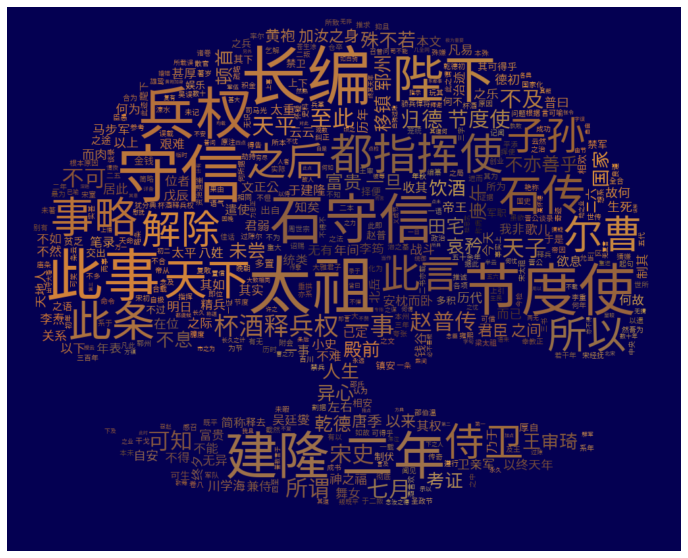

In [ ]:
# recolor wordcloud 
wc.recolor(color_func=ImageColorGenerator(mask), random_state=2)

# plot figure
plt.figure(figsize=(15,10))

# show image
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Well done! Now, we have made a nice word cloud with the shape of a tree. Feel free to play around with different options, such as different background colours, the mask, and the text. 

`Pay attention: when you select the mask image, the image needs to be large enough for the word cloud, otherwise, you will get an error.` 

## Downloading Image

After having our word cloud, you can right-click and directly download it. Another way to download the image is to use the function provided by **google.colab**. In the code below, we first convert our word cloud `wc` to a file called `wordcloud.png`, and then download it using `files.download()`.

In [ ]:
wc.to_file("wordcloud.png")
files.download("wordcloud.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Making a function

To simplify the full workflow, we can also create our function. You can better understand how to write a function [here](https://pinkychow1010.github.io/digital-chinese-history-blog/programming/chapter-1/level-1/2020/01/26/FunctionsNLoops_Basics.html). In this function, we will take the text, stopwords_path, mask_path, color_path, figsize, and font_path, and directly return an image.

In [38]:
def create_wordcloud(txt, stopwords_path, mask_path, color_path, figsize=(15,10), font_path="/content/drive/MyDrive/TaipeiSansTCBeta-Regular.ttf"):
  #color
  img = Image.open(color_path).convert("RGBA")
  color = Image.new("RGB", img.size, (255,255,255))
  color.paste(img,img)
  color = np.array(color)
  
  #shape
  shape = np.array(Image.open(mask_path))

  # create word cloud
  wc = WordCloud(background_color="#040052", max_words=2000,
                font_path=font_path,
                mask=shape,
                max_font_size=100, random_state=42, width=1000, height=860, margin=2)
  
  # create a word list from text
  word_list = jieba_processing_txt(txt, stopwords_path)
  
  # add word list to word cloud
  wc.generate(word_list)

  # recolor word cloud using ImageColorGenerator()
  wc.recolor(color_func=ImageColorGenerator(color), random_state=2)

  # display image
  plt.figure(figsize=figsize)
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.show()
  
  return wc

Now, we can apply the new function to our word cloud!

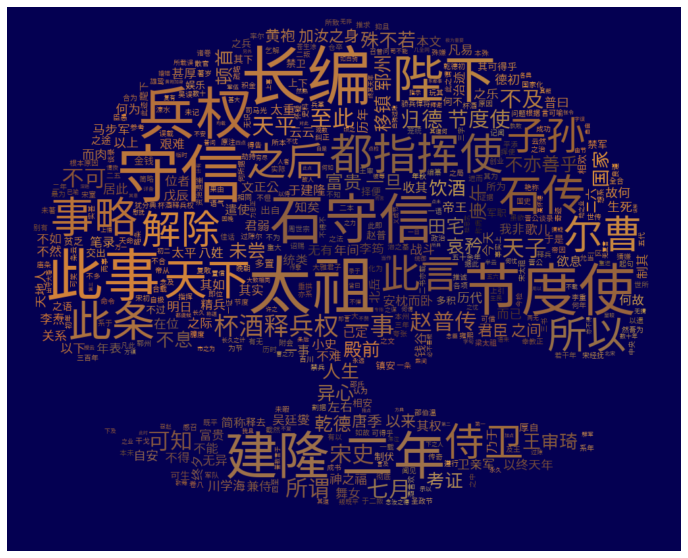

In [37]:
mask_path=r"/content/drive/MyDrive/tree.jpg"
color_path=r"/content/drive/MyDrive/song.jpg"

create_wordcloud(txt=txt, stopwords_path=stopwords_path, mask_path=mask_path, color_path=color_path)

# 🎉

Great that you have made it here 😎. Feel free to play around with functions to make sure you understand how everything works. You might have a question by now: **What if we do not want to copy a long text for the word cloud, from either grab it from a website or read it from a pdf file?** You will learn more in the future lesson.

<br>
<br>

***

## **Additional information**

This notebook is provided for educational purpose and feel free to report any issue on GitHub.

<br>

**Author:** Ka Hei, Chow

**License:** The code in this notebook is licensed under the [Creative Commons by Attribution 4.0 license](https://creativecommons.org/licenses/by/4.0/).

**Last modified:** January 2022

<br>

***

<br>

## **References:** 

https://github.com/stopwords-iso/stopwords-zh

[Yeung Wong & Carrie Lo from cyda](https://github.com/cydalytics/Chinese_Word_Cloud)